#**Reza Dehkordi**
#**03-21-2021**

# **Overview:**
> as a data scientist for the largest wholesale grocery story in Lisbon, Portugal, I have been given the task of creating profiles of similar customers so we know how to target each segment from a marketing perspective. Based on the taks clustering seems to be best approach. Two clustering methods (K-Means and Hierachical) on a data set comprimizing of customer data of a wholesale grocery store distributor in Portugal. There are a total of 8 variables. There are two categorical variables, channel (retail and food catering industry) and region (Lisbon, Oporto, and Other). 


# **Data:**
> Data imported from https://archive.ics.uci.edu/ml/datasets/wholesale+customers with download link of https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

> the dataset includes 440 data points with 8 different features. As Clustering is a unsupervised learning method, the data set does not have a feature containing the labels for each record.

### **load in packages and load pandas dataframe**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import io

uploaded = files.upload()
df_main = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


# **EDA:**

### **Summary of dataset**

In [ ]:
print(df_main.shape)
print(df_main.isnull().values.all())
df_main.describe()

(440, 8)
False


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


> The shape of the dataset contains data points with 8 features. and there is no missing values for any of the features. the distribution and summary of each feature is also printed for better insight for each.

### **Distribution of the Categorical Data (Channel, Region):**

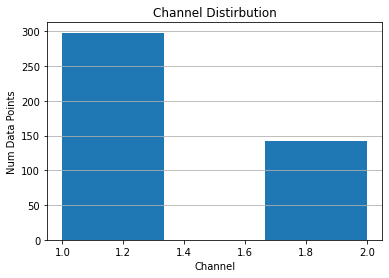

In [ ]:
p = plt.hist(x=df_main.Channel, bins=3)
plt.grid(axis='y')
plt.xlabel('Channel')
plt.ylabel('Num Data Points')
plt.title('Channel Distirbution')
plt.show()

> As shown, more than half of the data points are for individuals who have shopped through retial and less than half through catering.

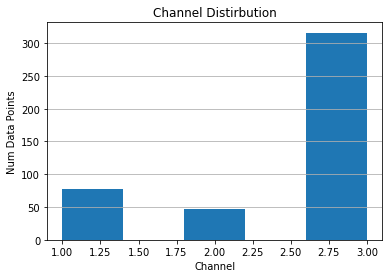

In [ ]:
p = plt.hist(x=df_main.Region, bins=5)
plt.grid(axis='y')
plt.xlabel('Channel')
plt.ylabel('Num Data Points')
plt.title('Channel Distirbution')
plt.show()

> As shown between the individual regions Lisbon and Porto, more records belong to shoppers in Lisbon. However the majority of the data points belong to Regions 3 which is the "other category".

# **Models:**

### **K-Means Clustering**
> in considering if our data should be scaled before performing this clustering algorithm. since scaling the data does not have any negative effects and it could be benneficial as Euclidean distance is used to update cluster centers, I beleive it would be wise to standradize the data before proceeding. 

In [ ]:
from sklearn.preprocessing import StandardScaler as ss

s = ss()

scaled = s.fit_transform(df_main)

df_scaled = pd.DataFrame(scaled, columns=['Channel','Region','Fresh','Milk','Grocery',
                                 'Frozen','Detergents_Paper','Delicassen'])
df_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [ ]:
km = KMeans(n_clusters=5).fit(df_scaled)

c = km.cluster_centers_
print(c)

[[ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]
 [-6.90297086e-01  5.90668285e-01  2.69334641e-02 -3.57654729e-01
  -4.62993297e-01  4.84858470e-03 -4.47852476e-01 -1.45194580e-01]
 [-4.76402214e-01  4.61367765e-01  2.86730383e+00  1.21528101e+00
   5.71915106e-01  3.68177005e+00 -1.92904155e-01  3.57553748e+00]
 [ 1.44865163e+00  1.69928497e-01 -3.06362835e-01  4.17500207e-01
   6.51879518e-01 -3.57269701e-01  6.76847966e-01  6.33174701e-03]]


##### **fitting multiple k-means algorithms and storing the values in an empty list**

Text(0, 0.5, 'Inertia')

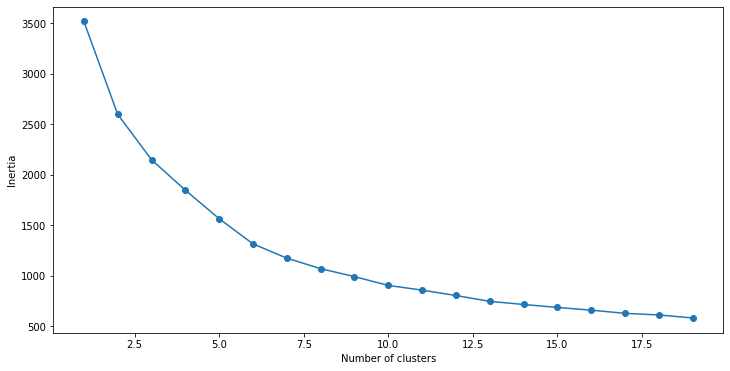

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

> Using the elbow method we can see that the value of k where the distortion starts drastically decrease is between 3-5. In my opinion you can witness the start of the drastic decrease at 5 and I think thats the best choice for the K - the number of clusters. 

In [ ]:
pred = km.predict(df_scaled)

##### **testing clustering method on different pairs of features**

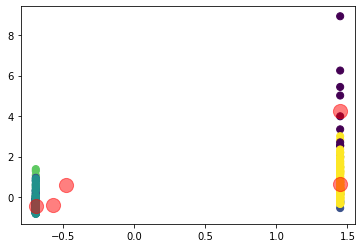

In [ ]:
plt.scatter(df_scaled.Channel, df_scaled.Grocery, c=pred, s=50, cmap='viridis')

c = km.cluster_centers_

plt.scatter(c[:, 0], c[:, 4], c='red', s=200, alpha=0.5);

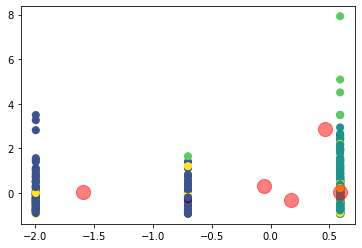

In [ ]:
plt.scatter(df_scaled.Region, df_scaled.Fresh, c=pred, s=50, cmap='viridis')

c = km.cluster_centers_

plt.scatter(c[:, 1], c[:, 2], c='red', s=200, alpha=0.5);

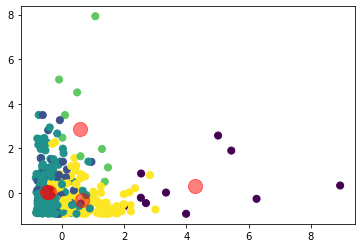

In [ ]:
plt.scatter(df_scaled.Grocery, df_scaled.Fresh, c=pred, s=50, cmap='viridis')

c = km.cluster_centers_

plt.scatter(c[:, 4], c[:, 2], c='red', s=200, alpha=0.5);

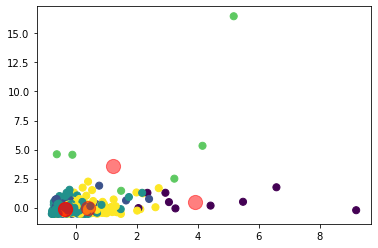

In [ ]:
plt.scatter(df_scaled.Milk, df_scaled.Delicassen, c=pred, s=50, cmap='viridis')

c = km.cluster_centers_

plt.scatter(c[:, 3], c[:, 7], c='red', s=200, alpha=0.5);

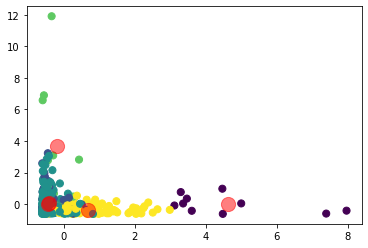

In [ ]:
plt.scatter(df_scaled.Detergents_Paper, df_scaled.Frozen, c=pred, s=50, cmap='viridis')

c = km.cluster_centers_

plt.scatter(c[:, 6], c[:, 5], c='red', s=200, alpha=0.5);

> Similar patterns can be detected from the BoxPlots above. From the visuals we can see that K-means does well identifing the different clusters accurately. Some of the comparasions between the features results in very similar outputs. the samples above give a good idea of what the results look like. The clustering is solid for identifing clusters in the feature pairs not involving categorical features. With the categorical features It can be seen that some of the cluster centers are not near any of the data points.

##### **Evaluation Measure for K-Means**

In [ ]:
sh = silhouette_score(df_scaled, pred)
sh

0.35721008796167153

> With 5 clusters the silhouette_score is about 0.37. As the silhouette_score is used to evaluate the distance between cluster centers, with value closer to 0 indicating very close cluster centers and value close to 1 indicating very far cluster centers. It is a tool made to aid with determining the number of clusters, K. Naturally in our situation as we increase the number of clusters the silhouette_score deceases indicating closer cluster centers. As a result I beleive K = 5 is one of the optimal solutions. 

### **Hierarchical Clustering**


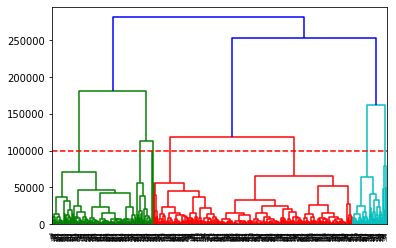

In [ ]:
from sklearn.cluster import AgglomerativeClustering

d = shc.dendrogram(shc.linkage(df_main, method='ward'))
plt.axhline(y=100000, color='r', linestyle='--')

In [ ]:
c = AgglomerativeClustering().fit(df_main)
pred = AgglomerativeClustering(5).fit_predict(df_main)

##### **testing clustering method on different pairs of features**

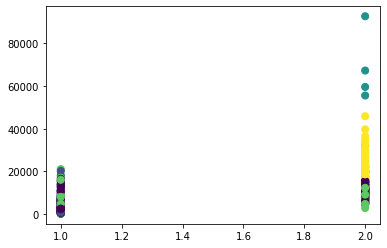

In [ ]:
plt.scatter(df_main.Channel, df_main.Grocery, c=pred, s=50, cmap='viridis')

#plt.scatter(c[:, 1], c[:, 2], c='red', s=200, alpha=0.5);

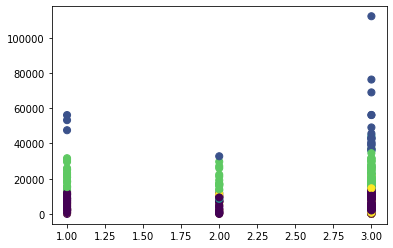

In [ ]:
plt.scatter(df_main.Region, df_main.Fresh, c=pred, s=50, cmap='viridis')

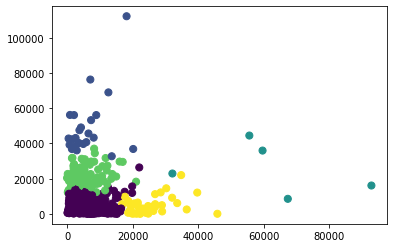

In [ ]:
plt.scatter(df_main.Grocery, df_main.Fresh, c=pred, s=50, cmap='viridis')

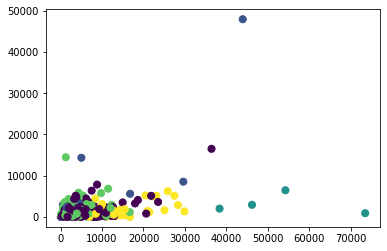

In [ ]:
plt.scatter(df_main.Milk, df_main.Delicassen, c=pred, s=50, cmap='viridis')

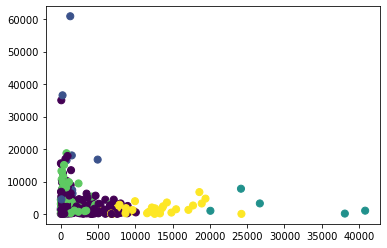

In [ ]:
plt.scatter(df_main.Detergents_Paper, df_main.Frozen, c=pred, s=50, cmap='viridis')

In [ ]:
sh = silhouette_score(df_main, pred)
sh

0.35222835905395905

> Similar but slightly lower silhoutte score can been seen with the hierarchical clustering method with 5 clusters. Again with this clustering I beleive 5 is the optimal number of clusters as with both increasing and decreasing the number of clusters will result in a lowe silhoutte score. From the above plots it can be seen that this clustering method performs well on some of the more spred out features but is unable to do so as accuretly with some of the more clustered features.

# **Conclusion:**
> Clustering is a simple, but strong method on finding patterns in data sets where simingly we do not have much output information from (regarding labaling) it allows us to cluster similar data points where the goal is to have one class per each cluster. From our obsorvations above we can see that the K-Means algorithm was more accurate with identifing clusters corresponding to each class but even with K-Means it is evident that clustering, cross features involving catergorical data can be difficult.

> Both Methods have their own pros and cons. While hierarchical clustering is easier to implement, the seemingly arbitrary decisions that work behind the facade make it a bit prone to errors and lack of accurecy. K-Means is a well stablished method used both in research and in the industry but one of th drawbacks of this method is having to find the optimal number of clusters. Tools such as the silhoutte score have been implemented to aid with this process.